#### Data Source : https://www.kaggle.com/lava18/google-play-store-apps#googleplaystore_user_reviews.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

# Importing Datasets

In [3]:
playstore_df = pd.read_csv('googleplaystore.csv')

playstore_user_reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

In [4]:
# Investigate the size of dataset

In [5]:
playstore_df.shape

(10840, 13)

In [6]:
# Taking a glimpse of the dataset

In [7]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0.0,Everyone,Sports,07-Oct-17,0.22,4.1 and up
1,.R,TOOLS,4.5,259,203k,"10,000+",Free,0.0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
2,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0.0,Mature 17+,Communication,03-Jul-18,4.2.4,4.1 and up
3,[adult swim],FAMILY,3.6,21433,21M,"1,000,000+",Free,0.0,Mature 17+,Entertainment,29-May-18,3.0.1805181047,5.0 and up
4,[BN] Blitz,SPORTS,3.2,4,5.6M,100+,Free,0.0,Everyone,Sports,17-May-18,4.6,4.3 and up


In [8]:
playstore_user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [9]:
# Removing duplicate values from both the datasets

In [10]:
playstore_user_reviews_df_1 = playstore_user_reviews_df.drop_duplicates()

In [11]:
playstore_df_1 = playstore_df.drop_duplicates()

In [12]:
# Reinvestigate the size of dataset

In [13]:
playstore_user_reviews_df_1.shape

(30679, 5)

In [14]:
playstore_user_reviews_df.shape

(64295, 5)

In [15]:
playstore_df_1.shape

(10357, 13)

In [16]:
playstore_df.shape

(10840, 13)

In [17]:
# Filter for required columns from the reviews data

In [18]:
playstore_user_reviews_df_2 = playstore_user_reviews_df_1[ ['App', 'Sentiment_Polarity'] ]

In [19]:
# Remove missing values and investigate shape

In [20]:
playstore_user_reviews_df_3 = playstore_user_reviews_df_2.dropna()

In [21]:
playstore_user_reviews_df_3.shape

(29697, 2)

In [22]:
# Calculating the average sentiment polarity. This metric will decide if the app has a positive sentiment or not

The logic used is if the avg. sentiment is greater than 0, we will consider the review to be positive else we will consider it to be negative sentiment

In [23]:
playstore_user_reviews_df_4 = playstore_user_reviews_df_3.groupby('App').agg({'Sentiment_Polarity' : 'mean'})

In [24]:
playstore_df_2 = playstore_df_1.drop_duplicates(subset='App', keep="last")

In [25]:
# Now  join the two datasets to get the sentiment values and app details together

In [26]:
merge_playstore = pd.merge(playstore_df_2, playstore_user_reviews_df_4, on = 'App', how = 'inner')

In [27]:
# Convert the scientific notations to decimals

In [28]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #to convert scientific notations to decimals

In [29]:
merge_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.000,2490,3.8M,"500,000+",Free,0.000,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,0.466
1,11st,SHOPPING,3.800,48732,20M,"10,000,000+",Free,0.000,Everyone,Shopping,31-Jul-18,7.8.1,4.0 and up,0.181
2,1800 Contacts - Lens Store,MEDICAL,4.700,23160,26M,"1,000,000+",Free,0.000,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,0.318
3,1LINE – One Line with One Touch,GAME,4.600,214878,10M,"10,000,000+",Free,0.000,Everyone,Board,03-Aug-18,2.0.4,4.1 and up,0.196
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.200,115773,Varies with device,"10,000,000+",Free,0.000,Everyone,Personalization,22-May-18,Varies with device,4.1 and up,0.424


In [30]:
# Analyze the summary details of the dataset

In [31]:
#playstore_df_2.head()
playstore_df_3 = playstore_df_2.groupby('Category').agg({'Category' : 'count',
                                                         'Rating' : 'mean'})
playstore_df_3

,Category,Rating
Category,,
ART_AND_DESIGN,61,4.359
AUTO_AND_VEHICLES,85,4.190
BEAUTY,53,4.279
BOOKS_AND_REFERENCE,222,4.345
BUSINESS,419,4.097
COMICS,56,4.181
COMMUNICATION,316,4.121
DATING,170,3.980
EDUCATION,102,4.351


# Visualizing the dataset

In [32]:
# Convert `reviews` and `price` to numeric

In [33]:
merge_playstore[["Price", "Reviews"]] = merge_playstore[["Price", "Reviews"]].apply(pd.to_numeric)

In [34]:
# Rating vs Category

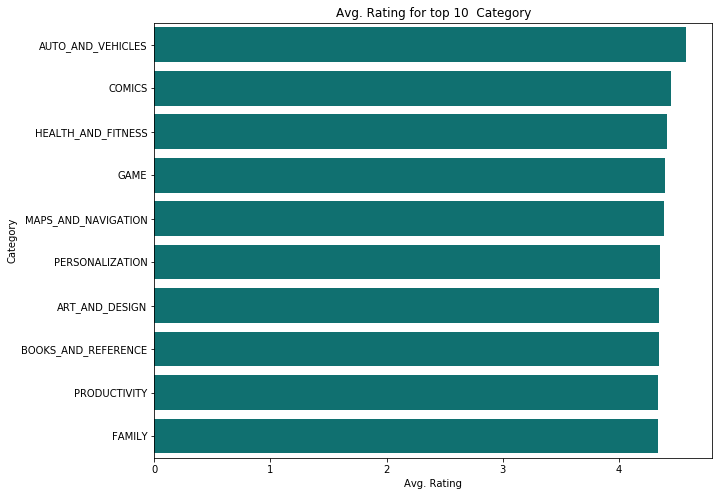

In [35]:
g=merge_playstore.groupby("Category",as_index=False).mean()[['Category','Rating']].sort_values('Rating',ascending=0).head(10)
plt.figure(figsize=(10,8))

sns.barplot(x='Rating',y='Category',data=g,color="teal")
plt.title("Avg. Rating for top 10  Category")
plt.xlabel('Avg. Rating')
plt.ylabel('Category');

In [36]:
# App Count vs Category

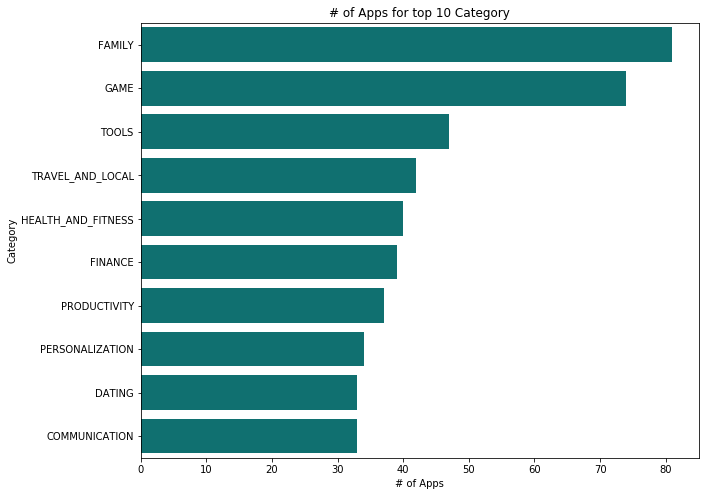

In [37]:
g=merge_playstore.groupby("Category",as_index=False).count()[['Category','App']].sort_values('App',ascending=0).head(10)
plt.figure(figsize=(10,8))

sns.barplot(x='App',y='Category',data=g,color="teal")
plt.title("# of Apps for top 10 Category")
plt.xlabel('# of Apps')
plt.ylabel('Category');


# Price vs Category

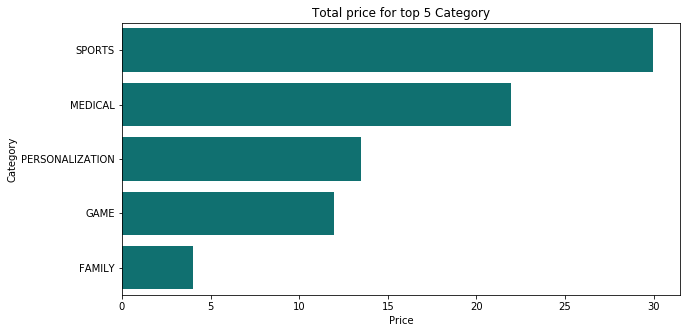

In [38]:
g=merge_playstore.groupby("Category",as_index=False).sum()[['Category','Price']].sort_values('Price',ascending=0).head()
plt.figure(figsize=(10,5))

sns.barplot(x='Price',y='Category',data=g,color="teal")
plt.title("Total price for top 5 Category")
plt.xlabel('Price')
plt.ylabel('Category');



# Reviews vs Category

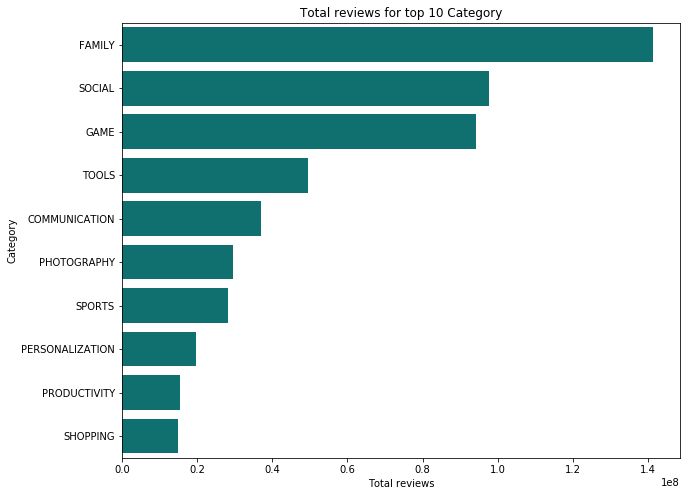

In [39]:
g=merge_playstore.groupby("Category",as_index=False).sum()[['Category','Reviews']].sort_values('Reviews',ascending=0).head(10)
plt.figure(figsize=(10,8))

sns.barplot(x='Reviews',y='Category',data=g,color="teal")
plt.title("Total reviews for top 10 Category")
plt.xlabel('Total reviews')
plt.ylabel('Category');



In [40]:
# Reviews vs Genres

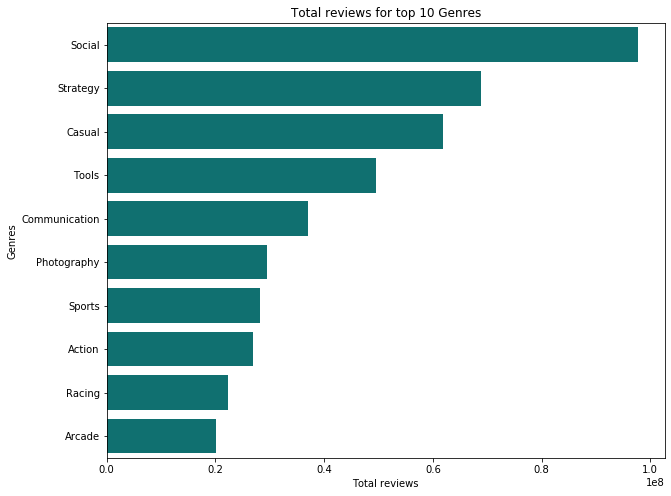

In [41]:
g=merge_playstore.groupby("Genres",as_index=False).sum()[['Genres','Reviews']].sort_values('Reviews',ascending=0).head(10)
plt.figure(figsize=(10,8))

sns.barplot(x='Reviews',y='Genres',data=g,color="teal")
plt.title("Total reviews for top 10 Genres")
plt.xlabel('Total reviews')
plt.ylabel('Genres');

# App count vs Genres

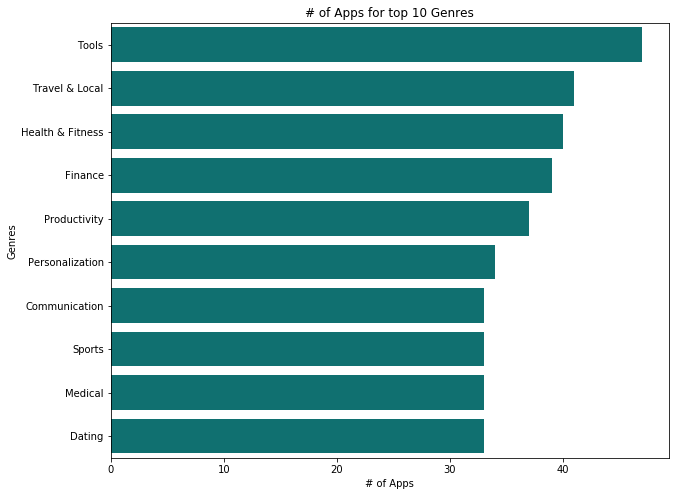

In [42]:
g=merge_playstore.groupby("Genres",as_index=False).count()[['Genres','App']].sort_values('App',ascending=0).head(10)
plt.figure(figsize=(10,8))

sns.barplot(x='App',y='Genres',data=g,color="teal")
plt.title("# of Apps for top 10 Genres")
plt.xlabel('# of Apps')
plt.ylabel('Genres');


# Modelling

In [43]:
def series_func(row):
    val = (row['Sentiment_Polarity'])
    if val > 0:
        Sentiment_Classifier = 1
    else:
        Sentiment_Classifier = 0
    return Sentiment_Classifier

merge_playstore['Sentiment_Classifier']=merge_playstore.apply(series_func,axis=1)

**Step1:** Define assymetric cost for misclassification<br />
**Step2:** Then split the data into test and validation<br />
**Step3:** Build the model and assess the performance

# Model 1 : Using variables `Reviews`

In [44]:
merge_playstore1=merge_playstore.dropna(axis=0, how='any')

In [45]:
logreg = LogisticRegression(class_weight={0:3,1:1})

In [46]:
X=merge_playstore1[['Reviews']]
y=merge_playstore1['Sentiment_Classifier']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=123)

In [47]:
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
cnf_matrix

C:\Users\kaustubh_14\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[  1,  24],
       [  6, 173]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

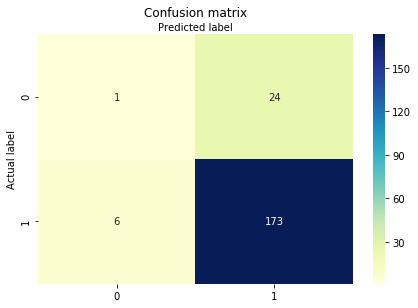

In [48]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred))
print("Recall:",metrics.recall_score(ytest, y_pred))
print("MR:",(ytest!=y_pred).mean())

Accuracy: 0.8529411764705882
Precision: 0.8781725888324873
Recall: 0.9664804469273743
MR: 0.14705882352941177


# Model 2 : Using variables `type`, `Category` and `Reviews`

In [51]:
merge_playstore1=merge_playstore.dropna(axis=0, how='any')

In [52]:
logreg = LogisticRegression(class_weight={0:3,1:1})

In [53]:
merge_playstore1=merge_playstore.dropna(axis=0, how='any')
cat_vars=['Type','Category']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(merge_playstore1[var], prefix=var)
    merge_playstore2=merge_playstore1.join(cat_list)
    merge_playstore1=merge_playstore2
cat_vars=['Type','Category']
data_vars=merge_playstore1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=merge_playstore1[to_keep]
data_final.columns.values

array(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Sentiment_Polarity', 'Sentiment_Classifier',
       'Type_Free', 'Type_Paid', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES',
       'Category_PARENTING', 'Category_PERSONALIZATION',
       'Category_PHOTOGRAPHY', 'Category_PRODUCTIVITY',
       'Category_SHOPPING', 'Category_SOCIAL', 'Category

In [54]:
X=merge_playstore1[['Reviews','Type_Free', 'Type_Paid', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES',
       'Category_PARENTING', 'Category_PERSONALIZATION',
       'Category_PHOTOGRAPHY', 'Category_PRODUCTIVITY',
       'Category_SHOPPING', 'Category_SOCIAL', 'Category_SPORTS',
       'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER']]
y=merge_playstore1['Sentiment_Classifier']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=123)

In [55]:
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
cnf_matrix

C:\Users\kaustubh_14\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[  0,  25],
       [  2, 177]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

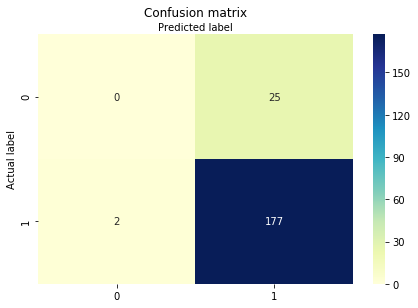

In [56]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred))
print("Recall:",metrics.recall_score(ytest, y_pred))
print("MR:",(ytest!=y_pred).mean())

Accuracy: 0.8676470588235294
Precision: 0.8762376237623762
Recall: 0.9888268156424581
MR: 0.1323529411764706


# Model 3 : Using variables `type`, `Genres` and `Reviews`

In [59]:
merge_playstore1=merge_playstore.dropna(axis=0, how='any')

In [60]:
logreg = LogisticRegression(class_weight={0:3,1:1})

In [61]:
merge_playstore1=merge_playstore.dropna(axis=0, how='any')
cat_vars=['Type','Genres']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(merge_playstore1[var], prefix=var)
    merge_playstore2=merge_playstore1.join(cat_list)
    merge_playstore1=merge_playstore2
cat_vars=['Type','Genres']
data_vars=merge_playstore1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=merge_playstore1[to_keep]
data_final.columns.values

array(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Price', 'Content Rating', 'Last Updated', 'Current Ver',
       'Android Ver', 'Sentiment_Polarity', 'Sentiment_Classifier',
       'Type_Free', 'Type_Paid', 'Genres_Action',
       'Genres_Action;Action & Adventure', 'Genres_Adventure',
       'Genres_Arcade', 'Genres_Art & Design',
       'Genres_Art & Design;Creativity',
       'Genres_Art & Design;Pretend Play', 'Genres_Auto & Vehicles',
       'Genres_Beauty', 'Genres_Board', 'Genres_Board;Brain Games',
       'Genres_Books & Reference', 'Genres_Business', 'Genres_Casual',
       'Genres_Casual;Action & Adventure', 'Genres_Casual;Brain Games',
       'Genres_Casual;Creativity', 'Genres_Casual;Pretend Play',
       'Genres_Comics', 'Genres_Communication', 'Genres_Dating',
       'Genres_Education', 'Genres_Education;Education',
       'Genres_Education;Pretend Play', 'Genres_Educational;Brain Games',
       'Genres_Educational;Creativity', 'Genres_Educationa

In [62]:
X=merge_playstore1[['Reviews','Type_Free', 'Type_Paid', 'Genres_Action',
       'Genres_Action;Action & Adventure', 'Genres_Adventure',
       'Genres_Arcade', 'Genres_Art & Design',
       'Genres_Art & Design;Creativity',
       'Genres_Art & Design;Pretend Play', 'Genres_Auto & Vehicles',
       'Genres_Beauty', 'Genres_Board', 'Genres_Board;Brain Games',
       'Genres_Books & Reference', 'Genres_Business', 'Genres_Casual',
       'Genres_Casual;Action & Adventure', 'Genres_Casual;Brain Games',
       'Genres_Casual;Creativity', 'Genres_Casual;Pretend Play',
       'Genres_Comics', 'Genres_Communication', 'Genres_Dating',
       'Genres_Education', 'Genres_Education;Education',
       'Genres_Education;Pretend Play', 'Genres_Educational;Brain Games',
       'Genres_Educational;Creativity', 'Genres_Educational;Education',
       'Genres_Educational;Pretend Play', 'Genres_Entertainment',
       'Genres_Entertainment;Music & Video', 'Genres_Events',
       'Genres_Finance', 'Genres_Food & Drink', 'Genres_Health & Fitness',
       'Genres_House & Home', 'Genres_Libraries & Demo',
       'Genres_Lifestyle', 'Genres_Maps & Navigation', 'Genres_Medical',
       'Genres_News & Magazines', 'Genres_Parenting',
       'Genres_Parenting;Education', 'Genres_Parenting;Music & Video',
       'Genres_Personalization', 'Genres_Photography',
       'Genres_Productivity', 'Genres_Puzzle',
       'Genres_Puzzle;Action & Adventure', 'Genres_Racing',
       'Genres_Racing;Action & Adventure', 'Genres_Role Playing',
       'Genres_Role Playing;Action & Adventure',
       'Genres_Role Playing;Pretend Play', 'Genres_Shopping',
       'Genres_Simulation', 'Genres_Simulation;Action & Adventure',
       'Genres_Simulation;Education', 'Genres_Simulation;Pretend Play',
       'Genres_Social', 'Genres_Sports',
       'Genres_Sports;Action & Adventure', 'Genres_Strategy',
       'Genres_Tools', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure',
       'Genres_Video Players & Editors', 'Genres_Weather']]
y=merge_playstore1['Sentiment_Classifier']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=123)

In [63]:
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
cnf_matrix

C:\Users\kaustubh_14\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[  0,  25],
       [  2, 177]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

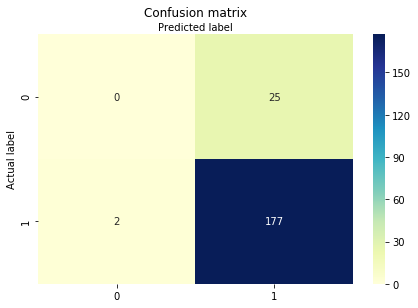

In [64]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [66]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred))
print("Recall:",metrics.recall_score(ytest, y_pred))
print("MR:",(ytest!=y_pred).mean())

Accuracy: 0.8676470588235294
Precision: 0.8762376237623762
Recall: 0.9888268156424581
MR: 0.1323529411764706


## Classification Tree Modelling

In [67]:
from sklearn.tree import DecisionTreeClassifier #import decision tree classifier 
from sklearn.model_selection import train_test_split #import train_test_split function
from sklearn import metrics # import scikit-learn metrics module for accuracy calculation
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from sklearn import tree

C:\Users\kaustubh_14\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ModuleNotFoundError: No module named 'pydotplus'

In [69]:
merge_playstore = merge_playstore.dropna()
merge_playstore['Installs'] = merge_playstore['Installs'].str.split('+', expand=True)
merge_playstore['Installs'] = merge_playstore['Installs'].str.replace(',','')
merge_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Classifier
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.000,2490,3.8M,500000,Free,0.000,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,0.466,1
1,11st,SHOPPING,3.800,48732,20M,10000000,Free,0.000,Everyone,Shopping,31-Jul-18,7.8.1,4.0 and up,0.181,1
2,1800 Contacts - Lens Store,MEDICAL,4.700,23160,26M,1000000,Free,0.000,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,0.318,1
3,1LINE – One Line with One Touch,GAME,4.600,214878,10M,10000000,Free,0.000,Everyone,Board,03-Aug-18,2.0.4,4.1 and up,0.196,1
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.200,115773,Varies with device,10000000,Free,0.000,Everyone,Personalization,22-May-18,Varies with device,4.1 and up,0.424,1


# Model 4

In [70]:
feature_cols = ['Rating', 'Reviews', 'Installs']
X_tree = merge_playstore[feature_cols] #Feature
y_tree = merge_playstore['Sentiment_Classifier']

In [71]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=13262480)

In [72]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6, class_weight={0:3,1:1}) #we have two types of criterion: a. gini and b. entropy
clf = clf.fit(X_tree_train,y_tree_train)

#Predict the response for test dataset
y_tree_pred = clf.predict(X_tree_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_tree_test, y_tree_pred))

Accuracy: 0.8163265306122449


In [73]:
tree.plot_tree(clf);

NameError: name 'tree' is not defined

In [74]:
cnf_matrix_tree = metrics.confusion_matrix(y_tree_test, y_tree_pred)
cnf_matrix_tree

array([[  2,  25],
       [ 20, 198]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

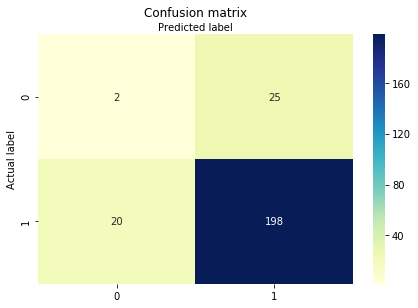

In [75]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_tree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Model 5

In [76]:
feature_cols1 = ['Reviews', 'Installs']
X1_tree = merge_playstore[feature_cols1] #Feature
y1_tree = merge_playstore['Sentiment_Classifier']

In [77]:
X1_tree_train, X1_tree_test, y1_tree_train, y1_tree_test = train_test_split(X1_tree, y1_tree, test_size=0.3, random_state=13262480)

In [78]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(max_depth=5, class_weight={0:3,1:1})

# Train Decision Tree Classifer
clf1 = clf1.fit(X1_tree_train,y1_tree_train)

#Predict the response for test dataset
y1_tree_pred = clf1.predict(X1_tree_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_tree_test, y1_tree_pred))

Accuracy: 0.8653061224489796


In [79]:
tree.plot_tree(clf1);

NameError: name 'tree' is not defined

In [80]:
cnf_matrix_tree1 = metrics.confusion_matrix(y1_tree_test, y1_tree_pred)
cnf_matrix_tree1

array([[  0,  27],
       [  6, 212]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

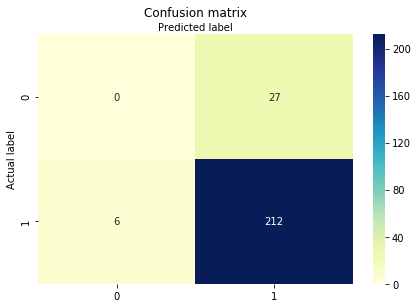

In [81]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_tree1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Both the models tested above have lower missclassification rate.

# Conclusion

Based on the above models, we observe that the Tree models perform better and also maintain decent amount of interpretability. Hence we finalize the Tree based model.

This model can be used to decide the promotional strategy while launching the new app. We can decide the number of downloads, reviews, ratings and number of downloads we want to achieve to have a positive sentiment about the app 